In [6]:
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from collections import Counter
from typing import List

In [7]:
xs, ys = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    random_state=0,
)
Counter(ys)

Counter({0: 50, 1: 50})

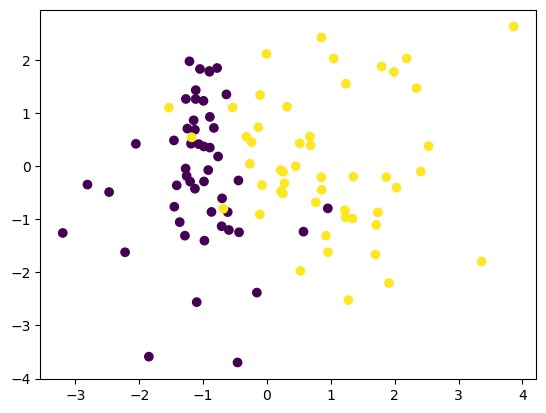

In [13]:
plt.scatter(xs[:, 0], xs[:, 1], c=ys)
plt.show()

In [3]:
Vector = List[float]
Matrix = List[Vector]


class LogisticRegression:
    def __init__(self, lr: float = 0.01, n_epochs: int = 1000) -> None:
        """Initialize model.

        :param float lr: Learning rate, defaults to 0.01
        :param int n_epochs: Number of iterations, defaults to 1000
        """
        self.lr = lr
        self.n_epochs = n_epochs

    def fit(self, xs: Matrix, ys: Vector) -> None:
        """Fit the model to dataset.

        :param List[List[float]] xs: x.
        :param List[float] ys: y.
        """
        xs = np.asarray(xs)
        ys = np.asarray(ys)
        n_samples, n_features = xs.shape
        # initialize weights and biases
        self.weights = np.zeros(n_features)
        self.biases = 0

        for _ in range(self.n_epochs):
            y_preds = self.predict(xs)
            errors = y_preds - ys
            dw = (-2 / n_samples) * np.dot(xs.T, errors)
            db = (-2 / n_samples) * np.sum(errors)
            self.weights = self.weights + self.lr * dw
            self.biases = self.biases + self.lr * db

    def logistic(self, xs: Matrix) -> Matrix:
        """Logistic function."""
        return 1 / (1 + np.exp(xs))

    def linear_prediction(self, xs: Matrix):
        """y = mx + b"""
        return np.dot(xs, self.weights) + self.biases

    def predict_proba(self, xs: Matrix) -> Vector:
        """Logistic proba on linear prediction."""
        return self.logistic(-1 * self.linear_prediction(xs))

    def predict(self, xs: Matrix) -> Vector:
        """Predict with 0.5 threshold.

        :param List[List[float]] xs: x.
        :return List[float]: y_pred.
        """
        return [1 if y > 0.5 else 0 for y in self.predict_proba(xs)]


lr = LogisticRegression()
lr.fit(xs, ys)
y_preds = lr.predict(xs)
acc = np.sum(ys == y_preds) / len(ys)
acc

0.84

# Explanation

## What's with the `linear_prediction`?

In [4]:
lr.linear_prediction(np.array([[2, 2], [3, 4], [4, 1]]))

array([0.00519162, 0.00678559, 0.01388876])

## How does the logistic function work?

In [5]:
xs = np.array([[2], [3]])
1 / (1 + np.exp(xs * 2 + 1))

array([[0.00669285],
       [0.00091105]])